In [33]:
"""import modules below"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### The purpose of this project is to get a feel for doing data analysis projects. The data set is a partial list of passengers aboard the titanic along with some detail about them. The data was provided from: https://www.kaggle.com/c/titanic/data. Any findings found through this project should be noted as tentative. This report is for Udacitys' nanodegree program. 

### Below is a snippet of data to help visualize it:

In [34]:
"""project CSV is loaded below and loaded in a pd dataframe then head function is used to get a feel for the data"""
file_name = 'titanic_data.csv' #file saved in same folder for ease of handling
titanic_df = pd.read_csv(file_name)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### To make it easier to understand, I'm going to switch 0 and 1 in "Survived to no/yes:

In [35]:
"""Modifiying the 'Survived' column to yes/no so it's more clear"""
titanic_df["Survived"].replace(1, "Yes", 'int')
titanic_df["Survived"].replace(0, "No", 'int')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Now I'm going to clean up any missing values:


In [36]:
print"'Here is a count of the missing values. As you can see, quite a few values are missing from both the 'Age' and 'Cabin' columns"
titanic_df.isnull().sum()

'Here is a count of the missing values. As you can see, quite a few values are missing from both the 'Age' and 'Cabin' columns


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Because I don't plane to do any analysis on the 'Cabin' or 'Embark' columns, I'm not going to worry about those missing data points and leave them in the dataset as NaN. However, I plan to use the 'Age' column for a variety of comparison so I'll  need to do something: I'll go ahead and make a seperate dataframe 'available_age_df', that has all rows with a 'NaN' entry for 'Age' removed that I'll use whenever I need to make a comparison using age. While removing 177 entries is a substantial amount, my analysis should still be okay since I have quite a bit of remaining passengers.

In [37]:
available_age_df = titanic_df.dropna(subset = ["Age"]) #dropping values using drop.na() only on 'Age' column
available_age_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-Inital thoughts on data:
        * Is age or sex any way related to survival?
        * What was the average age of passengers? 
        * What about the ratio of male to female?
        * is fare cost related to surival?
        * are the variables age and ticket cost related
        

To get a feel for the data, I'll compute some useful statistics:

In [38]:
print 'For the "Age" column: '
available_age_df["Age"].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9]) #modfying to get every 10th percentile

For the "Age" column: 


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: Age, dtype: float64

So it looks like most passengers were fairly young, with most being under 28. Now lets do the same with the "Fare" column:

In [39]:
print 'For the "Fare" column:'
titanic_df['Fare'].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9]) #modifying to get every 10th percentile

For the "Fare" column:


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: Fare, dtype: float64

Looks like most ticket prices were around $14 but outliers are bringing the mean up. Now lets look at the overall survival ratio: 

Populating the interactive namespace from numpy and matplotlib

Pie chart showing the survival ratio:


(-1.0100265976564469,
 1.0000000379163354,
 -1.0195496329176739,
 1.0121714842837193)

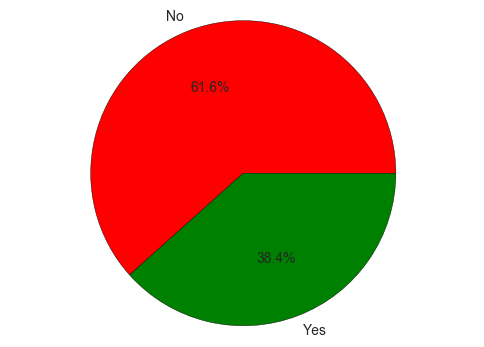

In [50]:
"""Making a pie chart of survived ratio"""
%pylab inline
print
print "Pie chart showing the survival ratio:"
survived_counts = titanic_df['Survived'].value_counts() # count of survived
survived_counts_list = [survived_counts.iloc[0], survived_counts.iloc[1]] #list for pie chart amounts
yes_no = ['No', 'Yes']  #list for pie chart label
plt.pie(survived_counts_list, labels = yes_no, autopct='%1.1f%%', colors = ('red', 'green'))
plt.axis('equal')

As you can see, most passengers did not surivive the trip, lets see if this trend hold true when we start to introduce differenet variables though. First, did the survival rates differ among men and women?

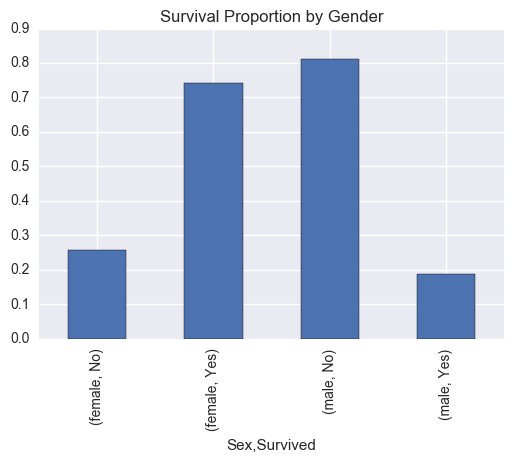

In [41]:
"""what was the rate of surival between men and women?"""
survived_gender_percent =(titanic_df.groupby(["Sex"])['Survived'].value_counts(sort = False) #calculating percentage that survived
                         / titanic_df.groupby(["Sex"])['Survived'].count())   #with respect to each gender
 
survived_gender_percent.plot(kind = 'bar', title = "Survival Proportion by Gender")


As can be seen in the chart above, the data clearly suggests that women had a much better chance of survival than men. Now lets look at survival based on age:

In [42]:
available_age_df.groupby(['Survived'])["Age"].describe()

Survived       
No        count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
Yes       count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

The above statistics suggest that there isn't much difference in survial with respect to age but a before and after histogram of ages might make things more clear.

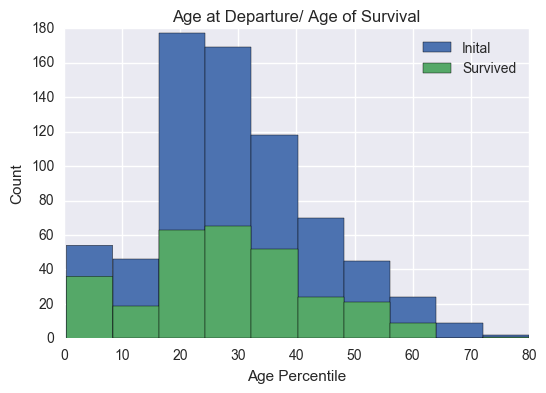

In [53]:
plt.hist(available_age_df.Age, label = "Inital") #inital age histogram
survived = available_age_df[available_age_df.Survived == "Yes"]
plt.hist(survived.Age, label = "Survived") #final histogram
plt.title("Age at Departure/ Age of Survival")
plt.legend()
plt.xlabel("Age Percentile")
plt.ylabel('Count')

As can be seen from the histogram above, there isn't much difference between the starting and final distribution of ages. While there are some slight differences, like 20-30 is slightly less than 30-40 in the final count, the overall distribution in unchanged. Now lets check if fare cost is realted to survival:

C:\Users\joeam\AppData\Local\conda\conda\envs\DAND\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


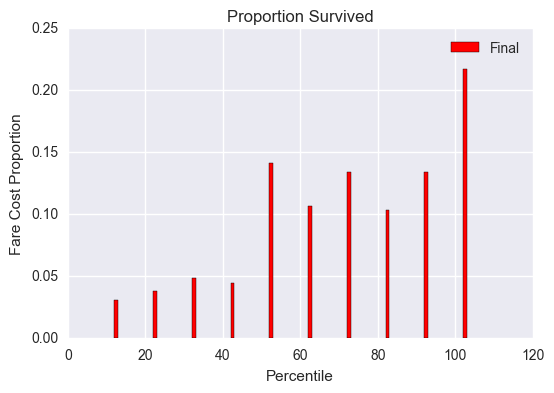

In [56]:
"""adding a new column to available_age_df to make this easier to work with, will be the percentile that the fair cost is in
first will add a helper function to do the conversion"""
def fare_to_perc(col):
    if col < 7.55:
        col = 10
    elif col < 7.854200:
        col = 20
    elif col < 8.050000:
        col = 30
    elif col < 10.500000:
        col = 40
    elif col < 14.454200:
        col = 50
    elif col < 21.679200:
        col = 60
    elif col < 27.000000:
        col = 70
    elif col < 39.687500:
        col = 80
    elif col < 77.958300:
        col = 90
    else:
        col = 100
    return col
available_age_df["Fare_Percentile"] = available_age_df["Fare"].apply(fare_to_perc)
data = available_age_df.Fare_Percentile.value_counts(sort = False) / available_age_df.Fare_Percentile.size #calculating intial fare percent
survived = available_age_df[available_age_df.Survived == "Yes"]
data_survived = survived.Fare_Percentile.value_counts(sort = False) / survived.Fare_Percentile.size  #calculating survived fare percent
data_survived = data_survived.values
data = data.values
column_names = [10, 20, 30 , 40, 50, 60, 70,  80, 90, 100]
plt.bar(column_names, data, width = 1 , color="blue", label = "Initial") # initial bar chart
survived = available_age_df[available_age_df.Survived == "Yes"] #making new dt for only survived passengers
plt.bar([entry + 2 for entry in column_names], data_survived, width = 1, color="red", label = "Final") #final bar chart
plt.title("Proportion Survived")
plt.ylabel('Fare Cost Proportion')
plt.xlabel("Percentile")
plt.legend()

The chart above shows both the starting proportion for each data subset and the final.The initial proportions are all fairly the same because the subsets were grouped by using the pd.describe function to give every 10th percentile. Then as we can see, at the by the end of the trip, the remaining passengers are clearly skewed to the higher end of fare cost, suggesting that passengers that paid a higher fair were more likely to survive. Now, getting away from survival rates, lets see if the fare cost and age are related:

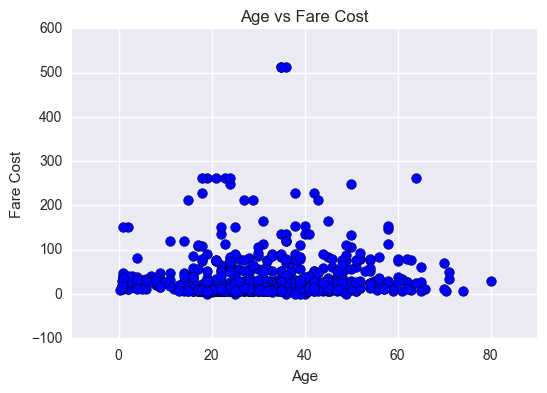

In [47]:
plt.scatter(available_age_df["Age"], available_age_df["Fare"], s = 50) #scatter plot of age v fare
plt.title("Age vs Fare Cost")
plt.ylabel("Fare Cost")
plt.xlabel('Age')


As can be seen above, there isn't much of a correlation between fare and age. Most data points are near the botton and the ones that are not are fairly evenly distributed. 

## Conclusions

Based on my inital review, I have some idea about the questions that I initally asked. It appears that sex is related to survival with Females being much more likely to have survived. Age seems to be less correlated with survival though, proper statistical analysis should be performed to analyis this however. It also appears that fair cost is related to survival, once again though, proper statistical analysis should be performed to find the strength of the correlation. Then finnaly, there appears to be no correlation between the variables age and fare cost.
